In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv(r"D:\py_machine_learning\datasets\titanic - titanic.csv")
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt 

In [4]:
df['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

<Axes: xlabel='Age'>

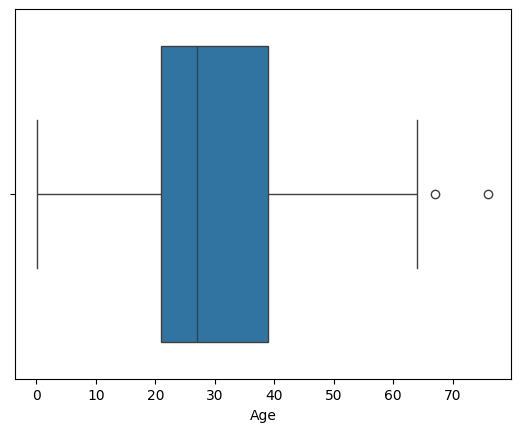

In [5]:
sns.boxplot(x=df['Age'])

In [6]:
# Finding the IQR 
percentile25 = df['Age'].quantile(0.25)
percentile75 = df['Age'].quantile(0.75)

In [7]:
percentile25

np.float64(21.0)

In [8]:
percentile75

np.float64(39.0)

In [9]:
IQR = percentile75 - percentile25
IQR

np.float64(18.0)

In [10]:
upper_limit = percentile75 + 1.5*IQR
upper_limit

np.float64(66.0)

In [11]:
lower_limit = percentile25 - 1.5*IQR
lower_limit

np.float64(-6.0)

In [12]:
df[df['Age']>upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


In [13]:
df[df['Age']<lower_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [14]:
newdf = df[df['Age']<upper_limit]

In [16]:
# newdf

<function matplotlib.pyplot.show(close=None, block=None)>

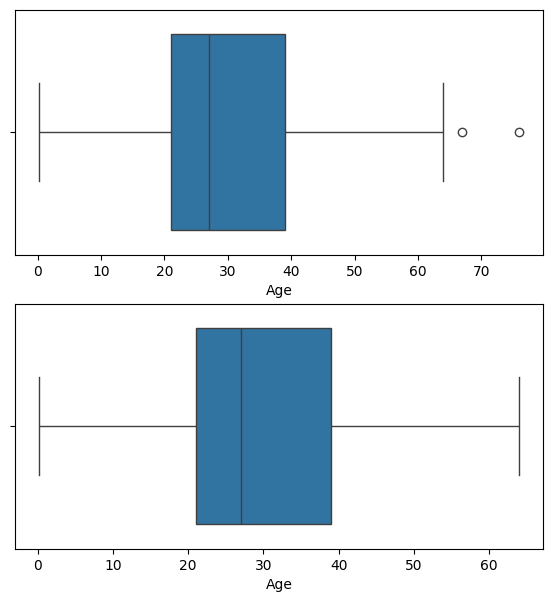

In [17]:
plt.figure(figsize=(15,7))

plt.subplot(222)
sns.boxplot(x=df['Age'])

plt.subplot(224)
sns.boxplot(x=newdf['Age'])
plt.show

In [18]:
new_df_cap = df.copy() 

In [19]:
new_df_cap['Age']=np.where(
    new_df_cap['Age']>upper_limit,upper_limit,

    np.where(
        new_df_cap['Age']<lower_limit,lower_limit,
        new_df_cap['Age']
    )
)

<function matplotlib.pyplot.show(close=None, block=None)>

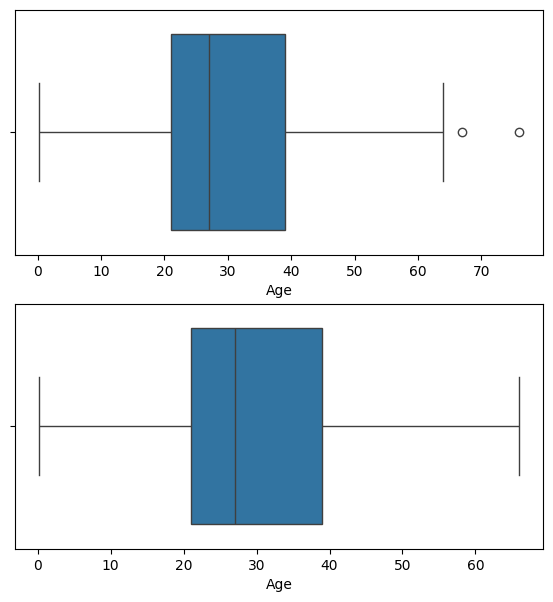

In [20]:
# Comparision 
plt.figure(figsize=(15,7))

plt.subplot(222)
sns.boxplot(x=df['Age'])

plt.subplot(224)
sns.boxplot(x=new_df_cap['Age'])
plt.show